In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example 1: Rect Function

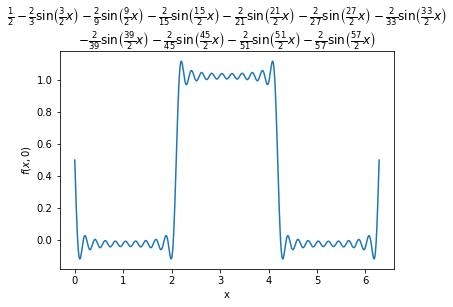

In [3]:
x = np.linspace(0, 2*np.pi, 1000)
n_harmonics = 10
f0 = 0.5*np.ones_like(x)
eq = "$\\frac{1}{2}"
for k in range(n_harmonics):
    num = 3*(1+k*2)
    denom = 2.0
    coeff = denom/num
    f0 = f0 - coeff*np.sin(x*num/denom)
    eq = eq + " - \\frac{%i}{%i}\\sin \\left( \\frac{%i}{%i} x \\right) "%(denom, num, num, denom)
    if k > 0 and k%5 == 0:
        eq = eq + "$\n$"
eq = eq + "$"
plt.plot(x, f0)
plt.title(eq)
plt.xlabel("x")
plt.ylabel("$f(x, 0)$")
plt.show()

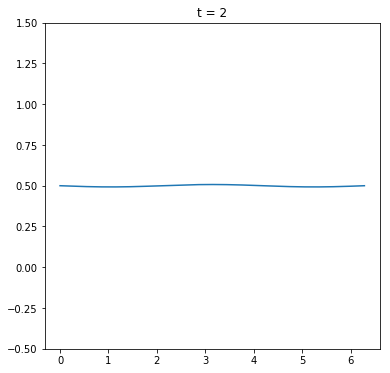

In [3]:
x = np.linspace(0, 2*np.pi, 1000)
ts = np.linspace(0, 2, 200)
n_harmonics = 10
plt.figure(figsize=(6, 6))
for i, t in enumerate(ts):
    f = 0.5*np.ones_like(x)
    for k in range(n_harmonics):
        num = 3*(1+k*2)
        denom = 2.0
        coeff = denom/num
        freq = num/denom
        f = f - coeff*np.sin(x*freq)*np.exp(-freq*freq*t)
    plt.clf()
    plt.plot(x, f)
    plt.ylim([-0.5, 1.5])
    plt.title("t = %.3g"%t)
    plt.savefig("%i.png"%i, bbox_inches='tight')

## Example 2: Bump Function

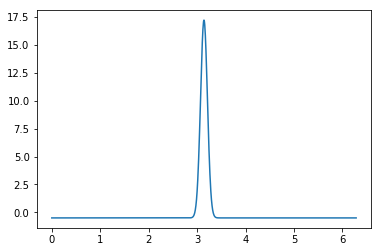

In [12]:
x = np.linspace(0, 2*np.pi, 1000)
alpha = 20
n_harmonics = 100
f = np.zeros_like(x)
for k in range(1, n_harmonics+1):
    coeff = np.exp(-(k**2/alpha**2))
    f = f + coeff*np.cos(k*(x-np.pi))
plt.plot(x, f)

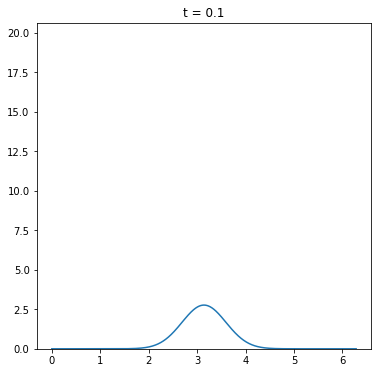

In [13]:
fmax = np.max(f)
x = np.linspace(0, 2*np.pi, 1000)
ts = np.linspace(0, 0.1, 100)
plt.figure(figsize=(6, 6))
for i, t in enumerate(ts):
    f = 0.5*np.ones_like(x)
    for k in range(1, n_harmonics+1):
        coeff = np.exp(-(k**2/alpha**2))
        freq = k
        f = f + coeff*np.cos(k*(x-np.pi))*np.exp(-freq*freq*t)
    plt.clf()
    plt.plot(x, f)
    plt.ylim([0, fmax*1.2])
    plt.title("t = %.3g"%t)
    plt.savefig("%i.png"%i, bbox_inches='tight')

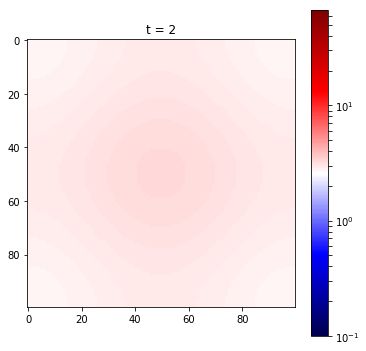

In [14]:
## 2D Heat Equation
from matplotlib.colors import LogNorm
pix = np.linspace(0, 2*np.pi, 100)
X, Y = np.meshgrid(pix, pix)
n_harmonics=10
alpha = 10

fmax = -1
fmin = -1
ts = np.linspace(0, 2, 100)
plt.figure(figsize=(6, 6))
for i, t in enumerate(ts):
    f = 2*np.ones_like(X)
    for a in range(0, n_harmonics):
        for b in range(0, n_harmonics):
            coeff = np.exp(-((a**2+b**2)/alpha**2))
            f = f + coeff*np.cos(a*(X-np.pi))*np.cos(b*(Y-np.pi))*np.exp(-(a**2+b**2)*t)
    if fmax == -1:
        fmax = np.max(f)*1.1
        fmin = np.min(f)*0.8
    plt.clf()
    plt.imshow(f, cmap='seismic', norm=LogNorm(vmin=fmin, vmax=fmax))
    plt.colorbar()
    plt.title("t = %.3g"%t)
    plt.savefig("%i.png"%i, bbox_inches='tight')